# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but to make it simple : predicting a continuous (numerical) variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
from tensorflow.keras.utils import plot_model

Note : in order to use plot_model, one must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Creating data to view and fit

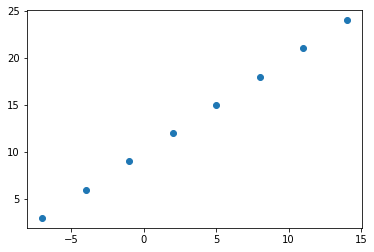

In [5]:
# Create features
X = np.array([-7., -4, -1, 2, 5, 8, 11, 14])

# Create labels
y = np.array([3., 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X,y)

In [6]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [7]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
# Turning the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [9]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [10]:
# Expand the dimension of a tensor : https://www.geeksforgeeks.org/python-tensorflow-expand_dims/
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

### Steps in modeling in TensorFlow

1. **Creating the model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the `loss function` (the function which will tells our model how far it's from performing well), the `optimizer` (tells the model how to update its internal patterns to better its predictions) and the `evaluation metrics` (human interpretable values for how well the model is doing).
3. **Fitting the model** - letting the model try to find patterns between features and labels.
4. **Evaluation** - Evaluate the model on the test data (in order to know how reliable are the model's predictions)


In TensorFlow, there are two main way of creating a model :
* Sequential API
* Functional API

In [11]:
# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD : Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 251ms/step - loss: 12.2702 - mae: 12.2702
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 12.1377 - mae: 12.1377
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 12.0052 - mae: 12.0052
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.8727 - mae: 11.8727
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 11.7402 - mae: 11.7402


**Note**  
A lot of function in TensorFlow, if they have a shortcut name (e.g. mae or SGD), can be replaced by a string variable to define the fact it is wished to used that specific function. For e.g., the step 2 in the above cell( Compile the model), can also be written as such : 

model.compile(loss="mae",  
              optimizer="sgd",  
              metrics=["mae"]  
             )

In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Trying to make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 146ms/step


array([[8.99842]], dtype=float32)

The predicted value (y) should be 27 when X is 17. But we got -13.89, which is pretty far off. This is no surprising because the current MAE of our model is 17.3050, which means : on average, our model predict something that is 17.3050 points off where is should be (MAE).

In [14]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 76ms/step


array([[8.99842]], dtype=float32)

In [15]:
y_pred + 17.3050

array([[26.303421]], dtype=float32)

The value is still off, our model is performing poorly.   
Now, we need to improve our model.

### Improving our model

We can improve our model by altering the steps we took to create a model.  

1. **Creating a model** - Here, we might :
* add more layers, 
* increase the number of hidden units (also called neurons) within each of th hidden layers, 
* change the activation function of each layer

2. **Compiling the model** - Here, we might :
* change the optimization function,
* or perhaps changes the **learning rate** of the optimization function

3. **Fitting the model** - Here, we might :
* fit the model for more epochs (make it train for longer)
* fit the model on more data (give the model more examples to learn from)

In [16]:
# 1st experiment : add a hidden layer, and more epochs, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 1s 657ms/step - loss: 13.9906 - mae: 13.9906
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4238 - mae: 13.4238
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8666 - mae: 12.8666
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3223 - mae: 12.3223
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7697 - mae: 11.7697
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2091 - mae: 11.2091
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6438 - mae: 10.6438
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0621 - mae: 10.0621
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4483 - mae: 9.4483
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8032 - mae: 8.8032
Epoch 11/100
1/1 [==============================] - 0s 5ms/st

Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7314 - mae: 3.7314
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7283 - mae: 3.7283
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7034 - mae: 3.7034
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7365 - mae: 3.7365
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6753 - mae: 3.6753
Epoch 94/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7449 - mae: 3.7449
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6799 - mae: 3.6799
Epoch 96/100
1/1 [==============================] - 0s 9ms/step - loss: 3.7212 - mae: 3.7212
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6965 - mae: 3.6965
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6992 - mae: 3.6992
Epoch 99/100
1/1 [==============================] - 0s 7ms/step - loss

The 1st experiment has resulted in a good improvement of the model

In [17]:
# Check how the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 146ms/step


array([[32.79997]], dtype=float32)

In [18]:
# 2nd experiment : buil a larger model, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr = Learning Rate
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=300) # Increasing the number of epochs


Epoch 1/300


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 936ms/step - loss: 13.5860 - mae: 13.5860
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 13.5507 - mae: 13.5507
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 13.5165 - mae: 13.5165
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 13.4836 - mae: 13.4836
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 13.4511 - mae: 13.4511
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 13.4186 - mae: 13.4186
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 13.3861 - mae: 13.3861
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 13.3538 - mae: 13.3538
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 13.3222 - mae: 13.3222
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 13.2905 - mae: 13.2905
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 10.7862 - mae: 10.7862
Epoch 88/300
1/1 [==============================] - 0s 8ms/step - loss: 10.7547 - mae: 10.7547
Epoch 89/300
1/1 [==============================] - 0s 7ms/step - loss: 10.7231 - mae: 10.7231
Epoch 90/300
1/1 [==============================] - 0s 8ms/step - loss: 10.6915 - mae: 10.6915
Epoch 91/300
1/1 [==============================] - 0s 8ms/step - loss: 10.6597 - mae: 10.6597
Epoch 92/300
1/1 [==============================] - 0s 6ms/step - loss: 10.6276 - mae: 10.6276
Epoch 93/300
1/1 [==============================] - 0s 6ms/step - loss: 10.5952 - mae: 10.5952
Epoch 94/300
1/1 [==============================] - 0s 7ms/step - loss: 10.5625 - mae: 10.5625
Epoch 95/300
1/1 [==============================] - 0s 7ms/step - loss: 10.5294 - mae: 10.5294
Epoch 96/300
1/1 [==============================] - 0s 6ms/step - loss: 10.4959 - mae: 10.4959
Epoch 97/300
1/1 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 7ms/step - loss: 6.6255 - mae: 6.6255
Epoch 174/300
1/1 [==============================] - 0s 8ms/step - loss: 6.5534 - mae: 6.5534
Epoch 175/300
1/1 [==============================] - 0s 8ms/step - loss: 6.4805 - mae: 6.4805
Epoch 176/300
1/1 [==============================] - 0s 7ms/step - loss: 6.4069 - mae: 6.4069
Epoch 177/300
1/1 [==============================] - 0s 7ms/step - loss: 6.3326 - mae: 6.3326
Epoch 178/300
1/1 [==============================] - 0s 8ms/step - loss: 6.2577 - mae: 6.2577
Epoch 179/300
1/1 [==============================] - 0s 7ms/step - loss: 6.1820 - mae: 6.1820
Epoch 180/300
1/1 [==============================] - 0s 6ms/step - loss: 6.1057 - mae: 6.1057
Epoch 181/300
1/1 [==============================] - 0s 7ms/step - loss: 6.0285 - mae: 6.0285
Epoch 182/300
1/1 [==============================] - 0s 7ms/step - loss: 5.9506 - mae: 5.9506
Epoch 183/300
1/1 [==============================] - 0s 7ms/step - loss: 5

1/1 [==============================] - 0s 8ms/step - loss: 3.7742 - mae: 3.7742
Epoch 261/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7728 - mae: 3.7728
Epoch 262/300
1/1 [==============================] - 0s 8ms/step - loss: 3.7699 - mae: 3.7699
Epoch 263/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7655 - mae: 3.7655
Epoch 264/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7598 - mae: 3.7598
Epoch 265/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7614 - mae: 3.7614
Epoch 266/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7630 - mae: 3.7630
Epoch 267/300
1/1 [==============================] - 0s 8ms/step - loss: 3.7613 - mae: 3.7613
Epoch 268/300
1/1 [==============================] - 0s 9ms/step - loss: 3.7616 - mae: 3.7616
Epoch 269/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7607 - mae: 3.7607
Epoch 270/300
1/1 [==============================] - 0s 8ms/step - loss: 3

The 2nd model, although more larger, don't provide a better training result compared to the previously built one.

In [19]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 167ms/step


array([[32.047325]], dtype=float32)

In [21]:
# 3rd experiment : add a hidden layer, more epochs, and review the learning rate, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 1s 683ms/step - loss: 12.9510 - mae: 12.9510
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0711 - mae: 12.0711
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1863 - mae: 11.1863
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2921 - mae: 10.2921
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4252 - mae: 9.4252
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7050 - mae: 8.7050
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.9530 - mae: 7.9530
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.1765 - mae: 7.1765
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3764 - mae: 6.3764
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.5421 - mae: 5.5421
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 9ms/step - loss: 0.1814 - mae: 0.1814
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1862 - mae: 0.1862
Epoch 91/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1806 - mae: 0.1806
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1536 - mae: 0.1536
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1027 - mae: 0.1027
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2740 - mae: 0.2740
Epoch 95/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2362 - mae: 0.2362
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3203 - mae: 0.3203
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2914 - mae: 0.2914
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1134 - mae: 0.1134
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4667 - ma

The loss is 0.1750; this model should perform really well.

In [22]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 164ms/step


array([[28.107271]], dtype=float32)

The model has predicted 26.918, while the real value is 27. We can conclude that the prediction is pretty well.  
**Observation** : adjusting the learning rate of our model has result in the best improvement so far.

**Model improvement rules** - When improving a model :
* **make many small changes** (experiments) and **test each one**, rather than always doing extremely large changes, because otherwise, if one does too big of a change, he might not be sure what caused the improvement or know improvement of the model.
* **the learning rate is potentially the most important hyper-parameter that can be changed** on a neural networks in order to improve it

## Evaluating a model


In practice, a typical workflow one goes through when buidling neural networks is :    
``` Build a model -> fit it -> evaluate it -> tweak a model -> fit it evaluate it -> tweak a model -> fit it -> evaluate it -> ... ```



When it comes to evaluation, there is one words one should memorize, and remember : **visualize**.

It's a good idea to visualize : 
* `The data` - what data are we working with ? What does it look like ?
* `The model` itself - what does our model look like ?
* `The training` of the model - how does the model perform while it learns ?
* `The predictions` of the model - how do the predictions of the model line up agains the real values ?


Let us dig into these steps here a bit further by working on a little bit of a larger problem.

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [25]:
# Make labels for the dataset

y = X + 10   # y = X + 10 is the formula(pattern) we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

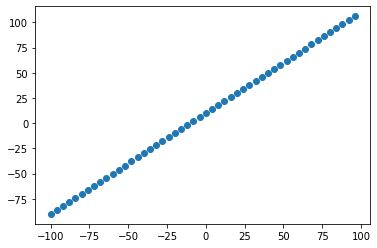

In [26]:
# Visualize the data

plt.scatter(X, y)

### The 03 set of data

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - the model gets tuned on this data (it is the above mentionned *tweak the model*), which is typically 10-15% of the total data available.
* **Test set** - the model gets evaluated on this data to test what is has learned (to check how it performs on data is hasn't see before); this set is typically 10-15% of the available data.

In [27]:
# Check how many samples we have
nb_data = len(X)
nb_data

50

In [28]:
# Split the data into train and test sets

X_train = X[: int(nb_data*.8)] # 80% of the data
y_train = y[: int(nb_data*.8)] # 80% of the data

X_test = X[int(nb_data*.8):] # 20% of the data
y_test = y[int(nb_data*.8):] # 20% of the data


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that data was divided in training and testing sets, let's visualize it again.

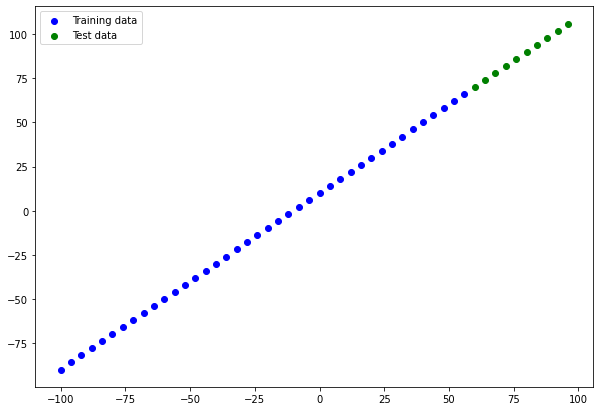

In [29]:
plt.figure( figsize=(10,7) )

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

#Show a legend
plt.legend();

### Building a neural network

In [30]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics=["mae"])



#### Visualizing the model

In [31]:
# TODO: uncomment the code in this cell to let it generate its error

# # Get an idea of what the model looks like before running it
# model.summary()

In [32]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [33]:
X.ndim

1

In [34]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

* The explanation of the Prof : X[0] contains a scalar, so the input_shape of our model is 1; in case X[0] contain for example 3 different numbers, then input_shape would be 3.    
* My own deduction : Another way to analyze it is based on the number of dimensions of X : X.ndim return 1, which means X is represented on one dimension, so the input shape is 1.

In [35]:
# Let's create a model which builds automatically by 
#    defining the input_shape argument in the first layer (that is what is usually done in practice)

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [X.ndim] ) # tf.keras.layers.Dense(1, input_shape= [1] )
                                                     #     refer to the previous cell to get 
                                                     #      explanations on why input_shape= [1]   
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])




In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


.summary() on a model show the layers it contains, the output shape, and the number of parameters of each layer.   
   
* The **Ouput Shape** here (None, 1) : the representation here is something I personnally need to do more research on
* The **Layer Type** `Dense` : it is another word for `fully connected`. A fully connected layer means each neuron in the said layer connects to all neurons in the next layer.
* There are 2 **Params** :  
 - **Total params** : total number of parameters in the model; these are the patterns that the model is going to learn
 - **Trainable parameters** : these are the parameters (patterns) the model can update as it trains
 - **Non-trainable params** : these are the patterns the model cannot update as it trains; when we import a model that has already learned patterns in data (**transfer learning**), we might freeze those learned patterns so that the model retains what it already knows

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video at http://introtodeeplearning.com/ 

🛠️**Exercise**: Try playing around with the number of hdden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [37]:
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape= [1] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Let us change the number of neuro from 3 to 1

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 3. Fit the model to the training data for 100 epochs
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 17.9717 - mae: 17.9717
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 13.1164 - mae: 13.1164
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7741 - mae: 11.7741
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2883 - mae: 9.2883
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1550 - mae: 10.1550
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4194 - mae: 9.4194
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5614 - mae: 8.5614
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0447 - mae: 9.0447
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7267 - mae: 18.7267
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1013 - mae: 10.1013
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 10.6602 - mae: 10.6602
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2702 - mae: 7.2702
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 12.8023 - mae: 12.8023
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4806 - mae: 7.4806
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 6.7549 - mae: 6.7549
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9523 - mae: 11.9523
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8840 - mae: 8.8840
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7232 - mae: 7.7232
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 6.7529 - mae: 6.7529
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6356 - mae: 8.6356
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 9.394

In [40]:
# Fit the model again, for another 100 epochs (so for a total of 200 epochs)
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 7.9163 - mae: 7.9163
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2318 - mae: 8.2318
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 7.0104 - mae: 7.0104
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.0793 - mae: 7.0793
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9154 - mae: 9.9154
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0672 - mae: 9.0672
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1395 - mae: 8.1395
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1231 - mae: 8.1231
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4662 - mae: 19.4662
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5646 - mae: 9.5646
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 7.623

2/2 [==============================] - 0s 5ms/step - loss: 12.4252 - mae: 12.4252
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5856 - mae: 7.5856
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0092 - mae: 9.0092
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 8.0162 - mae: 8.0162
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5767 - mae: 12.5767
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2248 - mae: 9.2248
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 7.9741 - mae: 7.9741
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5777 - mae: 11.5777
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4919 - mae: 8.4919
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 12.3612 - mae: 12.3612
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5

🔑 Every time model.fit() is called, it's going to fit for the extra epochs provided as parameters : the epochs are cumulative.

### Visualizing a model's layers

In [41]:
# Creating a new model, with 10 units in the hidden layers

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1] )  
]) 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

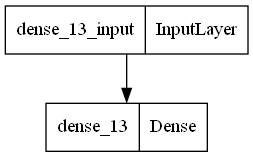

In [43]:
# Looking at the layers of the model
plot_model(model=model)

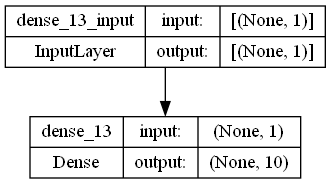

In [44]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

The plot_model() above will be very handy later on when we start creating more complex models with more hidden layers. 
   
Let's observe the plot of a little more complex model

In [45]:
# Creating a model, with 10 units in the hidden layers, and an output layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1], name="input_layer" ), 
    tf.keras.layers.Dense(1, name="output_layer")
], name="amazing_model") 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [47]:
model.summary()

Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


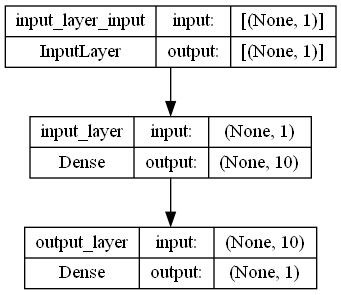

In [48]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions  
  
To visualize predictions, it's a good idea to plot them against the ground truth labels.  
  
Often, one will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions).

In [49]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 105ms/step


array([[ 75.87214 ],
       [ 80.814835],
       [ 85.75753 ],
       [ 90.70022 ],
       [ 95.642914],
       [100.58562 ],
       [105.52831 ],
       [110.47101 ],
       [115.4137  ],
       [120.356384]], dtype=float32)

In [50]:
# Looking at the content of y_test (the real value)
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [51]:
# Creating a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test,
                    predictions=y_pred):
    """
        Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure( figsize=(10,7) )

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    
    # Plot prediction data
    plt.scatter(test_data,predictions,c="r", label="Predictions")

    #Show a legend
    plt.legend() 

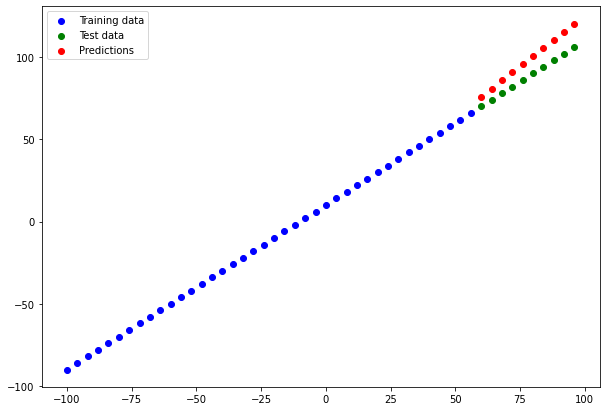

In [52]:
plot_predictions()

Looking at the plots, the model appear to be good since the distance between test data and the predictions is small. But depending on the scale of the plot, that seemingly short distance can in fact represent a fairly large error.   
So the way that can be figured out is by some evaluation metrics.


🛠️ **Exercise** : Try to improve the ploted model performance.

### Evaluation a model's predictions with regression evaluation metrics  
  
The best way to evaluate a model's predictions is by using evaluation metrics. Depending on the problem one is working on, there will be different evaluation metrics to evaluate a model's performance.
   
   
Since the current work is a regression, three of the main metrics are :
* **MAE** - Mean Absolute Error : "On evareage, how wrong is each of the model's predictions ?" . It is a great starter metric for any regression problem.
* **MSE** - Mean Square Error : "Square the average errors" (take the errors from the model predictions, square them, and find the average). It is great to use it when larger errors are more significant than smaller errors.   
* **Huber** : It is a combination of MSE and MAE; it's less sensitive to outliers than MSE.

In [53]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 268ms/step - loss: 10.1143 - mae: 10.1143


[10.114265441894531, 10.114265441894531]

In the evaluation's result above, there are values for `loss` and `mae`. They came from the hyper-parameters (loss and metrics) provided when building the model.

#### Manually calculate the MAE (as an exercise)

In [54]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.676717, 11.274066, 10.048494, 10.140043, 11.457166, 13.95137 ,
       17.62265 , 22.471008, 27.413696, 32.356384], dtype=float32)>

The result above does not make sense, because the result should be scalar, not an array . Let us observe y_test and y_pred to understand what is going on in the data.

In [55]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [56]:
y_pred

array([[ 75.87214 ],
       [ 80.814835],
       [ 85.75753 ],
       [ 90.70022 ],
       [ 95.642914],
       [100.58562 ],
       [105.52831 ],
       [110.47101 ],
       [115.4137  ],
       [120.356384]], dtype=float32)

In [57]:
y_pred.shape

(10, 1)

y_pred has one more dimension than y_test, so we need to remove its last dimension in order to have the same dimension for the two of them.

In [58]:
# remove the last dimension from y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.87214 ,  80.814835,  85.75753 ,  90.70022 ,  95.642914,
       100.58562 , 105.52831 , 110.47101 , 115.4137  , 120.356384],
      dtype=float32)>

In [59]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.114265>

The MAE manually computed here is the same as the one computed automatically before.

#### Manually calculate the MSE (as an exercise)

In [60]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 279.08502,  183.6266 ,  137.02866,  139.29117,  190.41412,
        290.39777,  439.24176,  636.94617,  883.51074, 1178.9355 ],
      dtype=float32)>

We have the same situation as when manually calculing MAE. We will use `tf.squeeze()` to solve the issue.

In [61]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred= tf.squeeze(y_pred) )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=109.62992>

MSE will typically be higher than MAE because, if we look at their formula, there is a square operation in MSE.

#### Define a function for MAE and MSE
It is so that the two of them can be used later

In [62]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

### Running experiments to improve a model

So far :
* some predictions where made with a trained model, 
* the predictions where compared to test data set, and the comparaison was visualized,
* the predictions where where evaluated with regression evaluation metrics, such as MAE and MSE.

The next question is : "**How do we get the error values lower ?** (How do we minimize the difference between the model's predictions and the test labels)". 

Remembering the workflow discussed before : `Build a model -> fit it -> evaluate it -> tweak it -> fit it -> tweak it -> ... `

If the Machine Learning explorer's motto is `visualize, visualize, visualize`, in other words :
* Visualizing our data
* Visualizing our model
* Visualizing our training
* Visualizing our prediction

Then, the Machine Learning practitioner's motto is `experiment, experiment, experiment, ...`. That is what we are going to do : try to run a few series of experiments to see if we can improve our model following the above mentioned workflow.

Recalling some ways that we can improve our model :
1. **Get more data** - get more examples for your model to train on (in other words, more opportunities to learn patterns/relationships between features and labels).
1. **Make the model larger** (using a more complex model) -  this might come in the form of more layers, or more hidden units in each layer, or both.
1. **Train for longer** - give the model more of a chance to find patterns in the data
1. **Review how the model is compiled** - change the optimization function, or learning rate of the optimization function

In [63]:
# Recalling our dataset
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

The question now is `Looking at our datas, how can we improve our model ?`. Let us review our options :   

1. Get more data ? We can't really get more data unless we just artificially make our datasest bigger, so this option is ruled out.
1. Make the model larger ? Yes we can
1. Train for longer ? Yes, we can
1. Review how the model is compiled ? Yes we can

In regard for this, let's design 03 experiments that we could do: 
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
1. `model_2` - 2 layers, trained for 100 epochs.
1. `model_3` - 2 layers, trained for 500 epochs.

The mindset of a Machine Learning practitioner is to start with a baseline model, and then change one of the parameters for his next experiment, then do the same for the next experiment, and so on.

**Creating model_1**: 1 layer, trained for 100 epochs

In [64]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100);

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 91.4855 - mae: 91.4855
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 56.0301 - mae: 56.0301
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 19.5742 - mae: 19.5742
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8257 - mae: 9.8257
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7696 - mae: 10.7696
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9638 - mae: 9.9638
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0199 - mae: 9.0199
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1069 - mae: 9.1069
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.8285 - mae: 19.8285
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.7317 - mae: 10.7317
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 9.9758 - mae: 9.9758
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2776 - mae: 7.2776
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7387 - mae: 12.7387
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3440 - mae: 7.3440
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7100 - mae: 7.7100
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1420 - mae: 7.1420
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5846 - mae: 12.5846
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9624 - mae: 9.9624
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1547 - mae: 9.1547
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0840 - mae: 12.0840
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 9.107

1/1 [==============================] - 0s 80ms/step


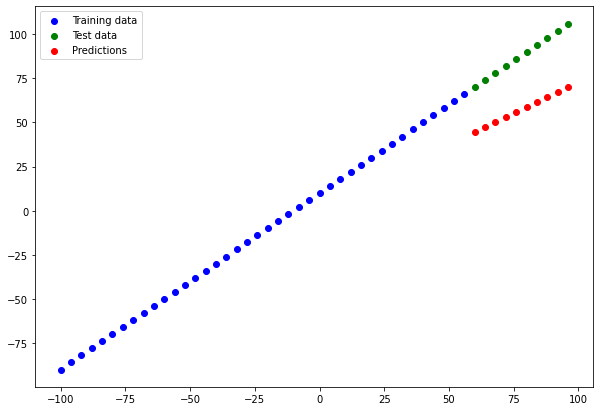

In [65]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test,axis=-1))
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=y_test,predictions=y_preds_1)

In [66]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.727758>,
 <tf.Tensor: shape=(), dtype=float32, numpy=954.6922>)

**Creating model_2**: 2 dense layers, trained for 100 epochs

In [67]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # the number of unit (10) here is arbitrary, can be 
                                                                    #   set to anything
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.SGD(),
               metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 69.4991 - mse: 7188.4399
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.4984 - mse: 422.7939
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 19.9982 - mse: 584.5443
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 12.9518 - mse: 226.7474
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.2790 - mse: 250.4793
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.4245 - mse: 147.9255
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.4663 - mse: 203.7537
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.9917 - mse: 144.3755
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 39.0607 - mse: 2378.8447
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6343 - mse: 997.2891
Epoch 11/100
2/2 [=============================

2/2 [==============================] - 0s 6ms/step - loss: 10.1895 - mse: 116.2980
Epoch 87/100
2/2 [==============================] - 0s 5ms/step - loss: 24.3621 - mse: 830.5446
Epoch 88/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0255 - mse: 513.9933
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.1791 - mse: 70.4470
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 18.2618 - mse: 494.7866
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 13.3136 - mse: 256.0700
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7288 - mse: 127.4238
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 14.1791 - mse: 276.3941
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 17.1799 - mse: 436.5522
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 16.7571 - mse: 384.1591
Epoch 96/100
2/2 [==============================] - 0s 5

In [68]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>

1/1 [==============================] - 0s 101ms/step


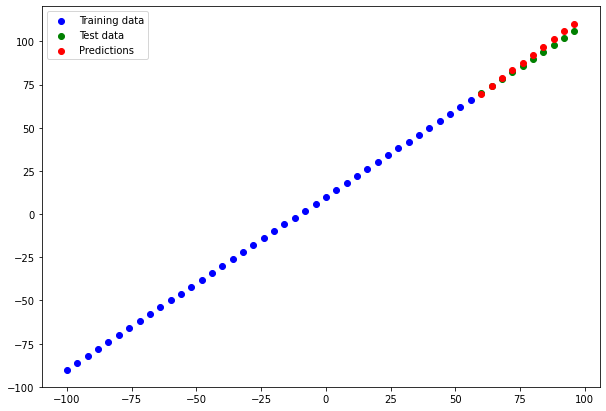

In [69]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2) #train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=y_test,

Our red dots (predictions) are a lot closer to the green dots (test label). This model is much better than the previous one.

In [70]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0217354>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0264754>)

In [71]:
# Let's compare the above metrics with mae_1 & mse_1
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.727758>,
 <tf.Tensor: shape=(), dtype=float32, numpy=954.6922>)

We can confirm that model_2 is doing much better than model_1

**Build `model_3`** - 2 layers, trained for 500 epochs   

The only thing we will change here, compared to model_2, is the number of epochs.

In [72]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 67.2493 - mae: 67.2493
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 20.7444 - mae: 20.7444
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 18.3264 - mae: 18.3264
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 13.3989 - mae: 13.3989
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.7853 - mae: 14.7853
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.7705 - mae: 11.7705
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1116 - mae: 11.1116
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0806 - mae: 11.0806
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.2035 - mae: 40.2035
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.6302 - mae: 27.6302
Epoch 11/500
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 11.2146 - mae: 11.2146
Epoch 88/500
2/2 [==============================] - 0s 5ms/step - loss: 25.9543 - mae: 25.9543
Epoch 89/500
2/2 [==============================] - 0s 3ms/step - loss: 9.5219 - mae: 9.5219
Epoch 90/500
2/2 [==============================] - 0s 5ms/step - loss: 18.2612 - mae: 18.2612
Epoch 91/500
2/2 [==============================] - 0s 7ms/step - loss: 10.3268 - mae: 10.3268
Epoch 92/500
2/2 [==============================] - 0s 4ms/step - loss: 17.5128 - mae: 17.5128
Epoch 93/500
2/2 [==============================] - 0s 4ms/step - loss: 6.8243 - mae: 6.8243
Epoch 94/500
2/2 [==============================] - 0s 5ms/step - loss: 17.6507 - mae: 17.6507
Epoch 95/500
2/2 [==============================] - 0s 6ms/step - loss: 17.3641 - mae: 17.3641
Epoch 96/500
2/2 [==============================] - 0s 5ms/step - loss: 11.5332 - mae: 11.5332
Epoch 97/500
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 16.5259 - mae: 16.5259
Epoch 174/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2404 - mae: 11.2404
Epoch 175/500
2/2 [==============================] - 0s 6ms/step - loss: 27.5958 - mae: 27.5958
Epoch 176/500
2/2 [==============================] - 0s 4ms/step - loss: 8.3091 - mae: 8.3091
Epoch 177/500
2/2 [==============================] - 0s 6ms/step - loss: 9.3034 - mae: 9.3034
Epoch 178/500
2/2 [==============================] - 0s 6ms/step - loss: 18.0919 - mae: 18.0919
Epoch 179/500
2/2 [==============================] - 0s 6ms/step - loss: 10.6399 - mae: 10.6399
Epoch 180/500
2/2 [==============================] - 0s 5ms/step - loss: 7.9394 - mae: 7.9394
Epoch 181/500
2/2 [==============================] - 0s 4ms/step - loss: 17.3306 - mae: 17.3306
Epoch 182/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0263 - mae: 11.0263
Epoch 183/500
2/2 [==============================] - 0s 4ms/

Epoch 259/500
2/2 [==============================] - 0s 5ms/step - loss: 16.6544 - mae: 16.6544
Epoch 260/500
2/2 [==============================] - 0s 5ms/step - loss: 49.5173 - mae: 49.5173
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 22.5086 - mae: 22.5086
Epoch 262/500
2/2 [==============================] - 0s 5ms/step - loss: 4.7558 - mae: 4.7558
Epoch 263/500
2/2 [==============================] - 0s 5ms/step - loss: 9.3419 - mae: 9.3419
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 22.8521 - mae: 22.8521
Epoch 265/500
2/2 [==============================] - 0s 5ms/step - loss: 10.8043 - mae: 10.8043
Epoch 266/500
2/2 [==============================] - 0s 5ms/step - loss: 13.2497 - mae: 13.2497
Epoch 267/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0761 - mae: 11.0761
Epoch 268/500
2/2 [==============================] - 0s 5ms/step - loss: 19.0989 - mae: 19.0989
Epoch 269/500
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 10.6793 - mae: 10.6793
Epoch 345/500
2/2 [==============================] - 0s 5ms/step - loss: 30.8264 - mae: 30.8264
Epoch 346/500
2/2 [==============================] - 0s 5ms/step - loss: 10.0581 - mae: 10.0581
Epoch 347/500
2/2 [==============================] - 0s 5ms/step - loss: 25.9349 - mae: 25.9349
Epoch 348/500
2/2 [==============================] - 0s 4ms/step - loss: 12.2751 - mae: 12.2751
Epoch 349/500
2/2 [==============================] - 0s 4ms/step - loss: 12.6661 - mae: 12.6661
Epoch 350/500
2/2 [==============================] - 0s 5ms/step - loss: 15.2807 - mae: 15.2807
Epoch 351/500
2/2 [==============================] - 0s 5ms/step - loss: 32.6374 - mae: 32.6374
Epoch 352/500
2/2 [==============================] - 0s 5ms/step - loss: 13.6408 - mae: 13.6408
Epoch 353/500
2/2 [==============================] - 0s 5ms/step - loss: 17.5643 - mae: 17.5643
Epoch 354/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 6ms/step - loss: 11.7925 - mae: 11.7925
Epoch 431/500
2/2 [==============================] - 0s 5ms/step - loss: 7.9496 - mae: 7.9496
Epoch 432/500
2/2 [==============================] - 0s 5ms/step - loss: 22.2353 - mae: 22.2353
Epoch 433/500
2/2 [==============================] - 0s 5ms/step - loss: 5.9330 - mae: 5.9330
Epoch 434/500
2/2 [==============================] - 0s 4ms/step - loss: 32.6460 - mae: 32.6460
Epoch 435/500
2/2 [==============================] - 0s 6ms/step - loss: 13.4939 - mae: 13.4939
Epoch 436/500
2/2 [==============================] - 0s 4ms/step - loss: 29.0609 - mae: 29.0609
Epoch 437/500
2/2 [==============================] - 0s 5ms/step - loss: 9.1855 - mae: 9.1855
Epoch 438/500
2/2 [==============================] - 0s 4ms/step - loss: 12.3627 - mae: 12.3627
Epoch 439/500
2/2 [==============================] - 0s 5ms/step - loss: 33.6522 - mae: 33.6522
Epoch 440/500
2/2 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 97ms/step


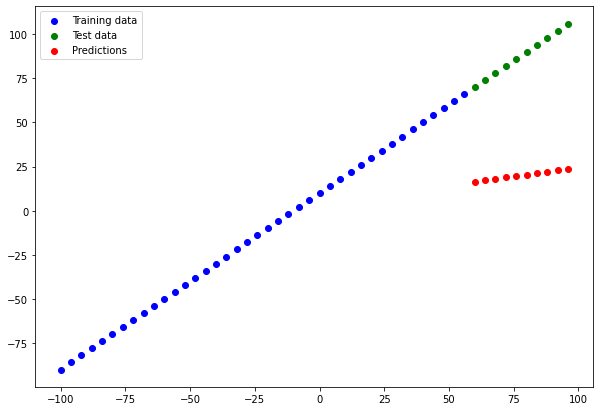

In [73]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

This model is even worse than the first model.
The reason for such a bad result should be that our model was trained for too long (500 epochs), so it is overfitting (this is a very important concept in Machine Learning, but we will not be cover it in this lesson).    
This is a prime example of tweaking some hyper-parameters, even ones that you intuitively think should result in a better result, actually lead to a poor result.

In [74]:
# model_3 evaluation metrics
mae_3 = mae(X_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=57.91874>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4697.3936>)

🔑**Note** : It is good practice to start by small experiments (small models) and make sure they work, and then increase their scale when necessary.

### Comparing the results of our modelling experiments

In [75]:
# Let's compare the result of our models using a dataframe

model_results = [["model_1", mae_1, mse_1], 
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
# model_results = {
#     "model_1": [ mae_1, mse_1],
#     "model_2": [mae_2, mse_2],
#     "model_3": [mae_3, mse_3],
# }

results_df = pd.DataFrame(model_results, columns=["model","MAE","MSE"])
results_df

,model,MAE,MSE
0,model_1,"tf.Tensor(30.727758, shape=(), dtype=float32)","tf.Tensor(954.6922, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(2.0217354, shape=(), dtype=float32)","tf.Tensor(6.0264754, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(57.91874, shape=(), dtype=float32)","tf.Tensor(4697.3936, shape=(), dtype=float32)"


This result is not easily readable. So we will get the numpy value of the MAEs and MSEs

In [76]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

results_df = pd.DataFrame(model_results, columns=["model","MAE","MSE"])
results_df

,model,MAE,MSE
0,model_1,30.727758,954.692200
1,model_2,2.021735,6.026475
2,model_3,57.918739,4697.393555


From the content of our dataframe, we can observe that model_2 perform the best. So we will look at its content.

In [77]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Notes** :
> * One of our main goal should be to minimize the time between each experiment (so that we don't have to wait, say, 10min before runing the next modelling experiment). 
> * The more experiments ones does, the more things one will figure out which don't work, and in turn get closer to figure out what does work : it is a lot of trials and errors. Remember the ML practionner motto : experiment, experiment, experiment.

### Tracking modelling experiments

One good habit in ML modelling is to tracks experiments results.    

Introducing tools that can help track results of experiments :
* [**TensorBoard**](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments.
* [**Weights & Biases**](https://wandb.ai/site) - a tool for tracking all kind of ML experiments; it can be plugged into TensorBoard. 

TensorBoard's usage will be covered later.

### Save a model      
Saving a model allow us to use it outside our notebook in place such as a web/mobile application.                  
There are two main format we can save our model to :
* SaveModel format : it is used when the saved model will only be used in the TensorFlow environement      
* HDF5 format : it used when the saved model will be used outside of TensorFlow environement

In [78]:
# Save a model using SaveModel format
model_2.save("./saved-models/model_2_SaveModel_format")

INFO:tensorflow:Assets written to: ./saved-models/model_2_SaveModel_format\assets


In [79]:
# Save model using HDF5 format
model_2.save("./saved-models/model_2_HDF5_format.h5")

### Load a saved model   



In [80]:
# Recall the structure of our saved model
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Load the SaveModel format model
loaded_SaveModel_format = tf.keras.models.load_model("./saved-models/model_2_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


We can confirm that loaded_SaveModel_format has the same structure as model_2, by looking at their .summary().      
Now we will also confirm that their patterns (weights and biases) are the same, by checking that they are doing the same predictions.

In [82]:
# Compare model_2 predictions with loaded_SaveModel_format predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)

model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 96ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [83]:
# Load the HDF5 format model
loaded_h5_model = tf.keras.models.load_model("./saved-models/model_2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


We can confirm through .summary() that the architecture of loaded_h5_model is the same as model_2. 

Now we will make sure that model_2 predictions match loaded_h5_model predictions.

In [84]:
# Compare model_2 predictions with loaded_h5_model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 101ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Puttting together what was learned so far

Now it is time to build a model for a more feature rich dataset.

### Preparing the dataset

We are going to have a look at the publicly available [Medical Cost Personal Datasets - Insurance Forecast by using Linear Regression](https://www.kaggle.com/datasets/mirichoi0218/insurance) from Kaggle

**Columns**

* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance     

The dataset can be downloaded from [here](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)          


The goal is to use the above columns from age to region to predict what someone's medical costs billed by health insurance will be.

In [85]:
insurance_df = pd.read_csv("data/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Looking at the above dataset:
* `charges`, the variable to be predicted, is called : `label`, or `output feature`, or `output variable`
* all variables other than `charges`, are the variables used to predict; they are called: `features`, or `input features`, or `input variables`

In [86]:
insurance_df.shape

(1338, 7)

In [87]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Now we will work on our first step in getting our data ready to pass into our machine/deep learning models : all our categorical features should be encoded to numerical values. Here, it is the one-hot encoding technique that will be used.  

We can one-hot encode our variables manually, but it will take a lot of work. So we will use the `pandas.get_dummies()` function. Here is [an example](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example) on how to proceed.

In [88]:
# One-hot encode dataframe so that it is all numbers
insurance_onehot_df = pd.get_dummies(insurance_df)
insurance_onehot_df.head().T

,0,1,2,3,4
age,19.000,18.0000,28.000,33.00000,32.0000
bmi,27.900,33.7700,33.000,22.70500,28.8800
children,0.000,1.0000,3.000,0.00000,0.0000
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552
sex_female,1.000,0.0000,0.000,0.00000,0.0000
sex_male,0.000,1.0000,1.000,1.00000,1.0000
smoker_no,0.000,1.0000,1.000,1.00000,1.0000
smoker_yes,1.000,0.0000,0.000,0.00000,0.0000
region_northeast,0.000,0.0000,0.000,0.00000,0.0000
region_northwest,0.000,0.0000,0.000,1.00000,1.0000


In [89]:
# insurance_onehot_df.isnull().sum()

### Building the regression model

In [90]:
# Create features (X)
X = insurance_onehot_df.drop("charges",axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [91]:
# Create labels (y)
y = insurance_onehot_df["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [92]:
# Create training and testing sets

random_seed=42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=random_seed)

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [93]:
# Build neural network (sort of like model_2 above)

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train,  epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8584.3281 - mae: 8584.3281
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7834.9746 - mae: 7834.9746
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7600.0630 - mae: 7600.0630
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7781.9766 - mae: 7781.9766
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7654.1919 - mae: 7654.1919
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.5044 - mae: 7645.5044
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7525.1553 - mae: 7525.1553
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.3784 - mae: 7693.3784
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7495.4404 - mae: 7495.4404
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7492.2061 - mae: 7492.2061

34/34 [==============================] - 0s 2ms/step - loss: 7262.6426 - mae: 7262.6426
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7469.3955 - mae: 7469.3955
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 7255.7769 - mae: 7255.7769
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 7399.6055 - mae: 7399.6055
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 7494.9253 - mae: 7494.9253
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7241.5786 - mae: 7241.5786
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 7381.6587 - mae: 7381.6587
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 7229.2231 - mae: 7229.2231
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 7058.6362 - mae: 7058.6362
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 7005.4146 - mae: 7005.4146
Epo

**Note**: We didn't have to reformat the input variable into tensors. The reason being, pandas is built on top of numpy: it is a big numpy matrix, and when we pass that to TensorFlow, it automatically knows how to deal with numpy arrays (we have seen that TensorFlow works with numpy arrays).

In [94]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8741.7197 - mae: 8741.7197


[8741.7197265625, 8741.7197265625]

The MAE of the model is 7021.52; this tell that on average, the model is wrong by about 7021.52            
That amount is to high, so the model need to be improved. 

To (try) improve the model, we will run 02 experiments. 
<br/><br/>
**Experiments**:
1. Add an extra layer with more hidden units
1. Train for longer
1. *Insert your own experiment here, up to your imagination/experience*

In [95]:
# 1st experiment: add extra layer with more hidden units

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: nan - mae: nan          
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 [

34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 94/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 95/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 96/100
34/34 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 98/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan


**💡 Personal note**                

Our model is outputing NAN as value. If we remove the first layer of 100 units, we would remark that the model we be trained fine. So we can theorize that the model is too large, and the dataset too small, for the model to learn anything.
There are a few workaround such a case:
1. Make the model a little smaller (the unit in the first layer can be reduced)
1. The learning rate of the model can be reduced (so that the model learn better)
1. The optimizer of the model can be chandeg.

In [96]:
# 1st experiment (updated): add extra layer with more hidden units, while using Adam optimizer

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13321.8232 - mae: 13321.8232
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13165.0752 - mae: 13165.0752
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12854.2549 - mae: 12854.2549
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12243.3379 - mae: 12243.3379
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11187.2451 - mae: 11187.2451
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9747.7129 - mae: 9747.7129
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8339.5361 - mae: 8339.5361
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7579.0371 - mae: 7579.0371
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7430.9307 - mae: 7430.9307
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7408.4893 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 5763.1733 - mae: 5763.1733
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5732.5049 - mae: 5732.5049
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5696.1270 - mae: 5696.1270
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 5667.1733 - mae: 5667.1733
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 5628.9980 - mae: 5628.9980
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 5587.4497 - mae: 5587.4497
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 5548.4160 - mae: 5548.4160
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 5504.1362 - mae: 5504.1362
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 5457.8462 - mae: 5457.8462
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 5414.9658 - mae: 5414.9658
Epo

Two remarks:
1. Now the model is not outputing NAN when we updated its optimizer
1. This model is performing better (the loss now is 4943) in training compared to the first one

In [97]:
# Evaluate the 2nd model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4776.6196 - mae: 4776.6196


[4776.61962890625, 4776.61962890625]

In [98]:
# Evaluate the 1st model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8741.7197 - mae: 8741.7197


[8741.7197265625, 8741.7197265625]

The 2nd model is indeed better than the 1st one, by a distance of 3000. Recall that only two things were tweaked: an extra layer was added, and the optimizer was changed; this might not always work, but it is good to remember they are one of the levers than can be turned to try to improve a model.

We will update our experiments (the experiments can be updated according to how each of them proceed).
 
<br/><br/>
**Experiments (update)**:
1. Add an extra layer with more hidden units, and use Adam optimizer
1. Same as above, but train for longer
1. *Insert your own experiment here, up to your imagination/experience*

The second experiment was updated to "Same as above,..." because we saw that the 1st experiment give us a better result than the original model; thus we choose to try to improve the model of the 1st experiment during the 2nd experiment.

In [99]:
# 2nd experiment : train longer on the model of the 1st experiment

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13269.3008 - mae: 13269.3008
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13071.3721 - mae: 13071.3721
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12655.7314 - mae: 12655.7314
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11873.3096 - mae: 11873.3096
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10644.0859 - mae: 10644.0859
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9194.1729 - mae: 9194.1729
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7983.5273 - mae: 7983.5273
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7502.6587 - mae: 7502.6587
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7434.7954 - mae: 7434.7954
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7415.5571 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 5834.0566 - mae: 5834.0566
Epoch 83/200
34/34 [==============================] - 0s 3ms/step - loss: 5805.9502 - mae: 5805.9502
Epoch 84/200
34/34 [==============================] - 0s 3ms/step - loss: 5773.0620 - mae: 5773.0620
Epoch 85/200
34/34 [==============================] - 0s 3ms/step - loss: 5746.6475 - mae: 5746.6475
Epoch 86/200
34/34 [==============================] - 0s 3ms/step - loss: 5712.4897 - mae: 5712.4897
Epoch 87/200
34/34 [==============================] - 0s 3ms/step - loss: 5675.8672 - mae: 5675.8672
Epoch 88/200
34/34 [==============================] - 0s 3ms/step - loss: 5640.8735 - mae: 5640.8735
Epoch 89/200
34/34 [==============================] - 0s 3ms/step - loss: 5602.5024 - mae: 5602.5024
Epoch 90/200
34/34 [==============================] - 0s 3ms/step - loss: 5561.6377 - mae: 5561.6377
Epoch 91/200
34/34 [==============================] - 0s 3ms/step - loss: 5525.3955 - mae: 5525.3955
Epo

34/34 [==============================] - 0s 3ms/step - loss: 3726.6218 - mae: 3726.6218
Epoch 163/200
34/34 [==============================] - 0s 3ms/step - loss: 3723.7144 - mae: 3723.7144
Epoch 164/200
34/34 [==============================] - 0s 3ms/step - loss: 3728.3245 - mae: 3728.3245
Epoch 165/200
34/34 [==============================] - 0s 3ms/step - loss: 3717.9895 - mae: 3717.9895
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 3722.6387 - mae: 3722.6387
Epoch 167/200
34/34 [==============================] - 0s 3ms/step - loss: 3723.2510 - mae: 3723.2510
Epoch 168/200
34/34 [==============================] - 0s 3ms/step - loss: 3716.9199 - mae: 3716.9199
Epoch 169/200
34/34 [==============================] - 0s 3ms/step - loss: 3716.0640 - mae: 3716.0640
Epoch 170/200
34/34 [==============================] - 0s 3ms/step - loss: 3710.5149 - mae: 3710.5149
Epoch 171/200
34/34 [==============================] - 0s 3ms/step - loss: 3710.0471 - mae: 3710

The loss in training is now 3658.0659, an improvement

In [100]:
# Evaluate the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3492.0759 - mae: 3492.0759


[3492.075927734375, 3492.075927734375]

In [101]:
# Evaluate the 2nd model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4776.6196 - mae: 4776.6196


[4776.61962890625, 4776.61962890625]

In [102]:
# Evaluate the 1st model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8741.7197 - mae: 8741.7197


[8741.7197265625, 8741.7197265625]

The 3rd model is performing better than the previous ones.

Now we will plot the **`history`** (also known as a **`loss curve`** or a **`training curve`**)

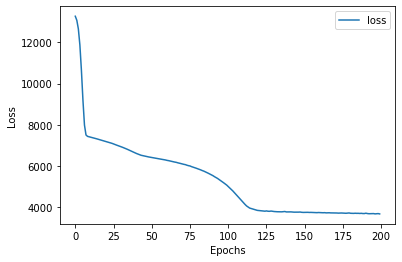

In [103]:
# Plot history
history_df = pd.DataFrame(history.history)
history_df.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

Looking at the plot, the decrease in the loss is originally steep until the models to train to around 110 epochs; from here, the decrease in the loss is small.

> 🤔 **Question:** How long should we train for ? <br/>
> 🫢 **Answer:** It depends.

The duration of the training depends on the problem we are working on.         
However, many people have asked this question before, so TensorFlow has a solution: the [**EarlyStopping Callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). It is a TensorFlow component we can add to a model to stop training once it stops improving a certain metric. For example, in our insurance_model_3, if we wanted to train it for 1000 epochs, we could want our model to stop training once its loss stops decreasing for say, 03, 05, or 10 epochs in a row, which means our model stopped improving.

In [104]:
# dir(history)

In [105]:
# Taking a look at history_df
history_df

,loss,mae
0,13269.300781,13269.300781
1,13071.372070,13071.372070
2,12655.731445,12655.731445
3,11873.309570,11873.309570
4,10644.085938,10644.085938
...,...,...
195,3683.286133,3683.286133
196,3669.316650,3669.316650
197,3676.836426,3676.836426
198,3682.827881,3682.827881


## Preprocessing data: normalization and standardization

**Normalization**: Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. [Read more about Normalization...](https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data)   


Note: `Normalize` can be used to mean either Standardize or Rescale; in the above definition, it stands for Rescale.


In terms of scaling values, neural networks tend to prefer normalization to standardization. If one is not sure on which to use, it is okay to try both and see which performs better.

📖 : [Scale, Standardize, or Normalize with Scikit-Learn: When to use MinMaxScaler, RobustScaler, StandardScaler, and Normalizer, by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

Based on what we learned so far, we will restart our model building process.

In [106]:
insurance_df = pd.read_csv("data/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
insurance_df.shape

(1338, 7)

In [108]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We are going to build a neural network to learn on the features once they have been normalized.

**Note**: `Column transformer` is a tool in Scikit-Learn that allows to build a pipeline to preprocess data before passing it to the model

In [109]:
# Create a column transformer
column_transformer = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # The features indicated in the list are those that will be rescaled at this stage of the preprocessing
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]), # handle_unknown="ignore" will make the OneHotEncoder() ignore any column it doesn't know about
)

# Create X and y values
X = insurance_df.drop("charges",axis=1)
y = insurance_df.loc[:,"charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Now we will fit the column transformer to the training data. Whenever we have a column transformer, we need to fit it the training data and then use that fit column transformer to transform the test data.

In [110]:
# Fit the column transformer to the training data
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

Now will take what we have learned from the training data to transform the training and test data

In [111]:
# Tranform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

In [112]:
# Check how the data that we started with look like
X_train.loc[0,:]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [113]:
# Check how the data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [114]:
# Check how the data look like now
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [115]:
# Comparing the shape of the original data against the preprocessed data
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been rescaled and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [116]:
# Build a neural network to fit on the preprocessed data


# Set the seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])

# 3. Fit the model
history_4 = insurance_model_4.fit(X_train_normal,y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.3730 - mae: 13344.3730
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.6816 - mae: 13336.6816
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13315.9180 - mae: 13315.9180
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13270.7744 - mae: 13270.7744
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13190.1758 - mae: 13190.1758
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13063.6162 - mae: 13063.6162
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12881.1230 - mae: 12881.1230
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12632.7061 - mae: 12632.7061
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12308.2051 - mae: 12308.2051
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11903.64

34/34 [==============================] - 0s 3ms/step - loss: 3674.9160 - mae: 3674.9160
Epoch 82/100
34/34 [==============================] - 0s 3ms/step - loss: 3671.9875 - mae: 3671.9875
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3665.7092 - mae: 3665.7092
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3663.0708 - mae: 3663.0708
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3660.6169 - mae: 3660.6169
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3659.3616 - mae: 3659.3616
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 3656.1733 - mae: 3656.1733
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 3653.9045 - mae: 3653.9045
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 3652.3101 - mae: 3652.3101
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3650.6448 - mae: 3650.6448
Epo

Now we have to test the model on the same type of data it was trained on. Since it was trained on preprocessed data, it has to be evaluated on preprocessed data.

In [117]:
# Evaluate the 4th model on normalized data (recall that it was trained 100 epochs)
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3436.7422 - mae: 3436.7422


[3436.7421875, 3436.7421875]

In [118]:
# Third model evaluation result (recall that 3rd model was trained 200 epochs)

# 9/9 [==============================] - 0s 2ms/step - loss: 3491.5759 - mae: 3491.5759

When the data is normalized, the model has a faster convergence time.

In [119]:
insurance_model_4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               1200      
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
